In [1]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
# Step 2: Load the Dataset
file_path = "C:/Users/subhashini/Downloads/netflix1.csv"  # Path to the CSV file

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Check for missing values
print(data.isnull().sum())


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [4]:
# Drop duplicates
data.drop_duplicates(inplace=True)


In [5]:
# Convert 'date_added' column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Verify the data types after conversion
data.dtypes


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

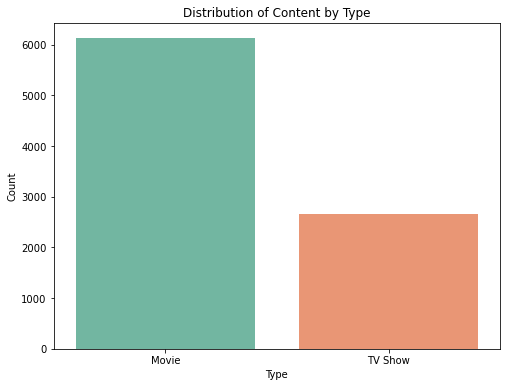

In [6]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()

# Plot the distribution of Movies vs TV Shows
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


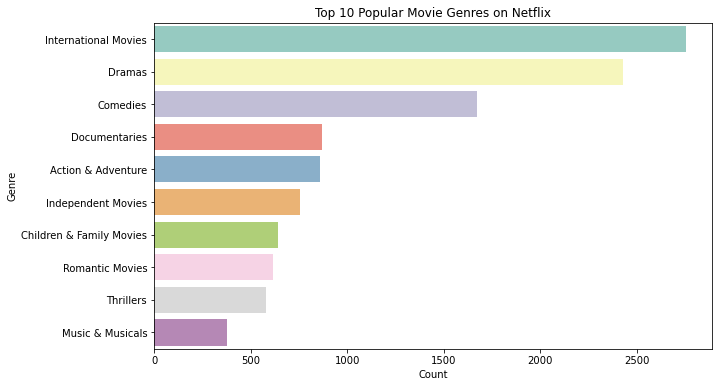

In [7]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))

# Count the frequency of each genre for Movies
movie_genres = data[data['type'] == 'Movie']['genres'].explode().value_counts().head(10)

# Plot the top 10 genres for Movies
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='Set3')
plt.title('Top 10 Popular Movie Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


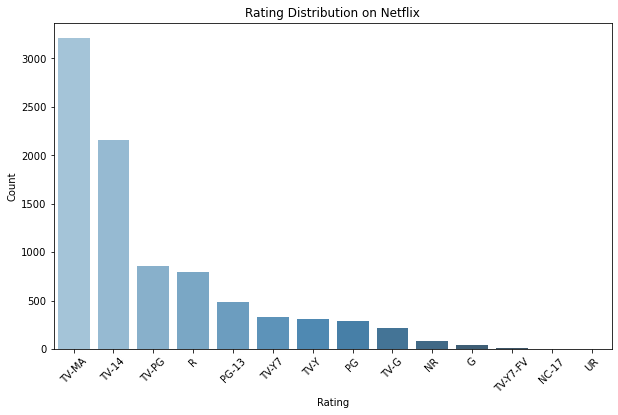

In [8]:
# Count the frequency of each rating type
rating_counts = data['rating'].value_counts()

# Plot the rating distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Blues_d')
plt.title('Rating Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


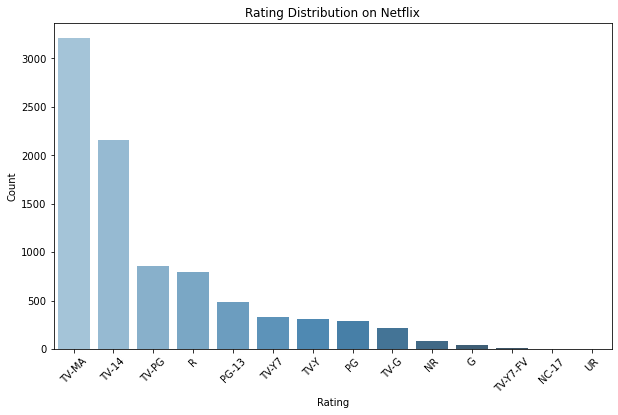

In [9]:
# Count the frequency of each rating type
rating_counts = data['rating'].value_counts()

# Plot the rating distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Blues_d')
plt.title('Rating Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


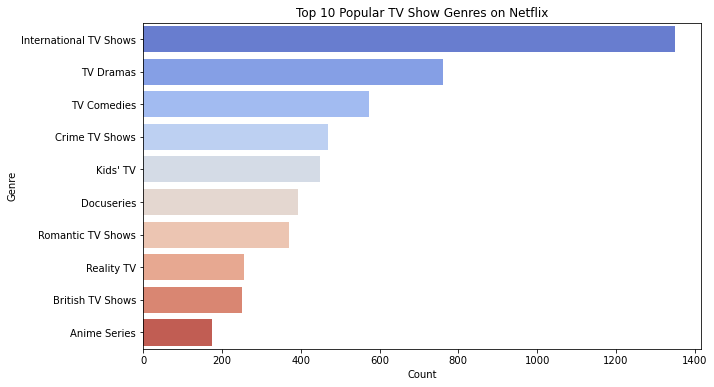

In [10]:
# Count the frequency of each genre for TV Shows
tv_genres = data[data['type'] == 'TV Show']['genres'].explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='coolwarm')
plt.title('Top 10 Popular TV Show Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


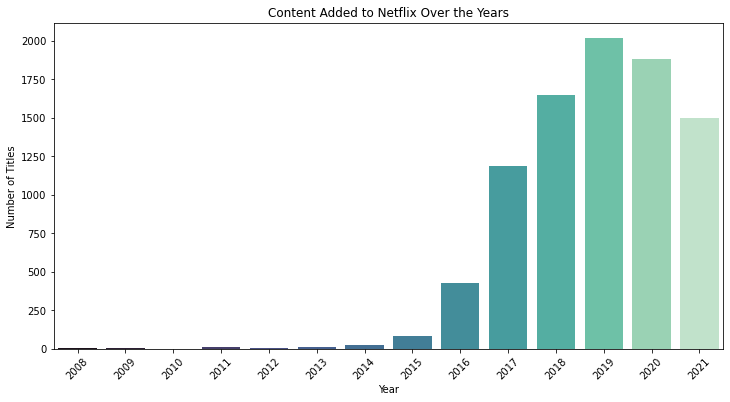

In [11]:
# Extract year from 'date_added'
data['year_added'] = data['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='mako')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


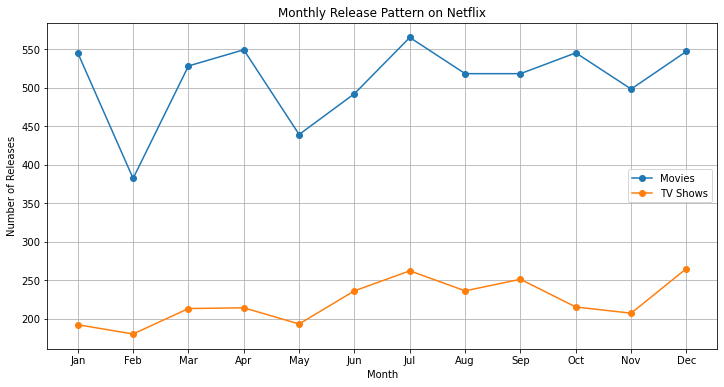

In [12]:
# Extract month from 'date_added'
data['month_added'] = data['date_added'].dt.month

monthly_movies = data[data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_shows  = data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_movies.index, monthly_movies.values, marker='o', label='Movies')
plt.plot(monthly_shows.index, monthly_shows.values, marker='o', label='TV Shows')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Release Pattern on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()


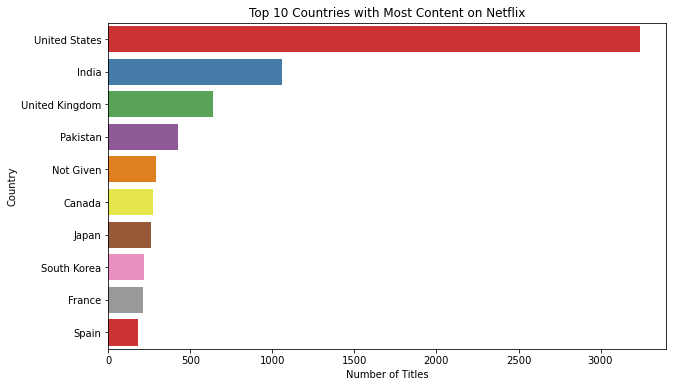

In [13]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set1')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


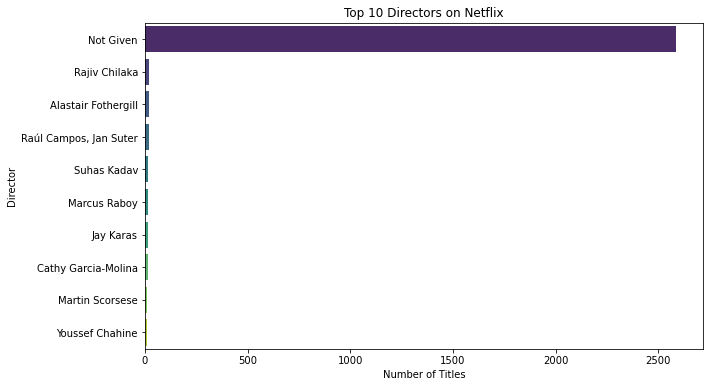

In [14]:
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


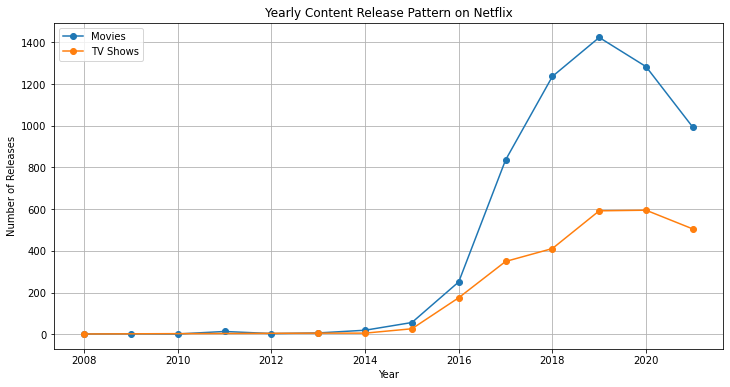

In [17]:
# Extract the year from the 'date_added' column
data['year_added'] = data['date_added'].dt.year

# Count releases by year for Movies and TV Shows
yearly_movies = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_shows = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()

# Plot the yearly release pattern
plt.figure(figsize=(12, 6))
plt.plot(yearly_movies.index, yearly_movies.values, label='Movies', marker='o')
plt.plot(yearly_shows.index, yearly_shows.values, label='TV Shows', marker='o')
plt.title('Yearly Content Release Pattern on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()
